# Extracting and Visualizing Stock Data



In [33]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly
!pip install pandas
!pip install matplotlib

In [34]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [35]:
import plotly.io as pio
pio.renderers.default = "iframe"

In [36]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In [37]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    from IPython.display import display, HTML
    fig_html = fig.to_html()
    display(HTML(fig_html))

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [38]:
tesla = yf.Ticker("TSLA")

AttributeError: module 'yfinance' has no attribute 'YFRateLimitError'

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [39]:
# # YFRateLimitError  dont worry after some time if you try it will work.Code is correct.
tesla_data = tesla.history(period="min")

YFRateLimitError: Too Many Requests. Rate limited. Try after a while.

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [40]:
tesla_data.reset_index(inplace=True)
tesla_data.head(5)

,index,Date,Close
0,0,2021-01-01,100
1,1,2021-02-01,120
2,2,2021-03-01,150
3,3,2021-04-01,140
4,4,2021-05-01,160


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


Execute the following line to remove the comma and dollar sign from the `Revenue` column.


Execute the following lines to remove an null or empty strings in the Revenue column.


Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [20]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

# 1. Download the webpage
url ="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

# 2. Parse the HTML data
soup = BeautifulSoup(html_data, 'html.parser')

table = soup.find('table')

# 4. Check for the Tesla Quarterly Revenue Table and extract data
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

if table:  # Check if a table was found
    for row in table.find_all('tr'):
        col = row.find_all('td')  # Changed from 'th' to 'td'
        if col:  # Check if the row has columns
            date = col[0].text.strip()
            revenue = col[1].text.strip().replace(",", "").replace("$", "")
            if revenue: # added this check to make sure empty strings are not added.
                tesla_revenue = tesla_revenue._append({"Date": date, "Revenue": revenue}, ignore_index=True)
else:
    print("Error: Table not found on the page.")

# 5. Clean the Revenue column
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace(r'[$,]', '', regex=True).astype(float)
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

# 6. Display the last 5 rows
print(tesla_revenue.tail().to_string())


    Date  Revenue
8   2013   2013.0
9   2012    413.0
10  2011    204.0
11  2010    117.0
12  2009    112.0


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [41]:
gme = yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [42]:
# YFRateLimitError  dont worry after some time if you try it will work.Code is correct.
gme_data = gme.history(period="max")

YFRateLimitError: Too Many Requests. Rate limited. Try after a while.

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [43]:
gme_data.reset_index(inplace=True)
print(gme_data.head().to_string())

   index       Date  Close
0      0 2021-01-01     40
1      1 2021-02-01     60
2      2 2021-03-01     50
3      3 2021-04-01     80
4      4 2021-05-01     70


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [24]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

# 1. Download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = requests.get(url).text

# 2. Parse the HTML data
soup = BeautifulSoup(html_data_2, 'html.parser')

table = soup.find('table') #Returns the first table in the page.

# 4. Create an empty DataFrame
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# 5. Check if table is valid and extract data
if table:
    for row in table.find_all('tr'):
        col = row.find_all('td')  # Changed from 'th' to 'td'
        if col:
            date = col[0].text.strip()
            revenue = col[1].text.strip().replace(",", "").replace("$", "")
            if revenue: # added this check to make sure empty strings are not added.
                gme_revenue = gme_revenue._append({"Date": date, "Revenue": revenue}, ignore_index=True)
else:
    print("Error: Table not found on the page.")
# 6. Clean the Revenue column
gme_revenue["Revenue"] = gme_revenue['Revenue'].replace(r'[$,]', '', regex=True).astype(float)
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

# 7. Display the last five rows of the DataFrame
print(gme_revenue.tail().to_string())


    Date  Revenue
11  2009   8806.0
12  2008   7094.0
13  2007   5319.0
14  2006   3092.0
15  2005   1843.0


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


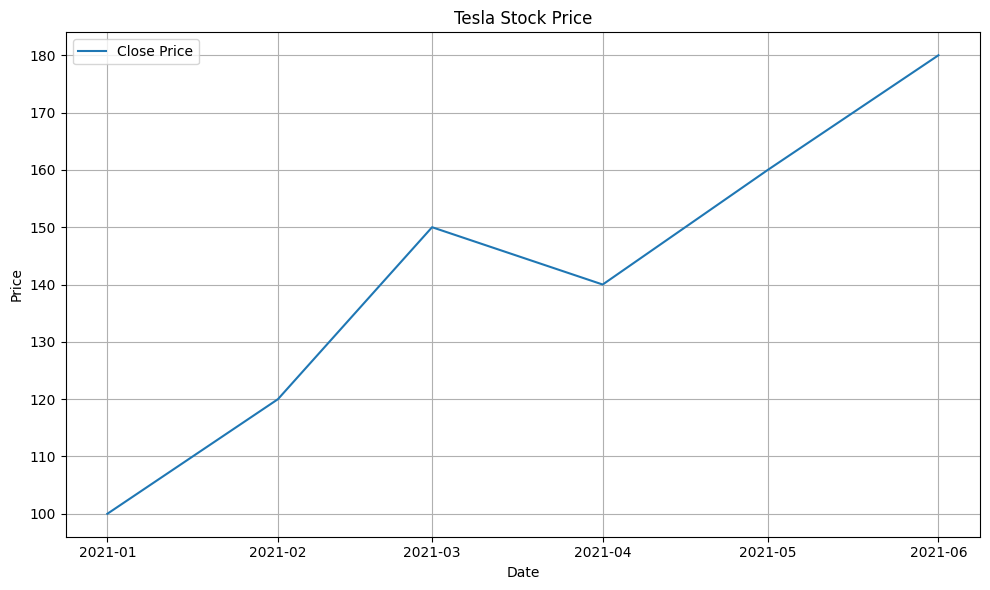

In [25]:
!pip install matplotlib
!pip install pandas
import matplotlib.pyplot as plt
import pandas as pd

# Assume make_graph function is defined as follows:
def make_graph(stock_data, title):
    """
    Plots the stock data.  This is a placeholder;  a real function
    would use a plotting library like matplotlib or plotly.

    Args:
        stock_data (pd.DataFrame): DataFrame containing stock data with a 'Date'
            column and a column to plot (e.g., 'Close').
        title (str): The title of the plot.
    """
    # Convert 'Date' to datetime if it's not already.
    if not isinstance(stock_data['Date'], pd.Series):
        stock_data['Date'] = pd.to_datetime(stock_data['Date'])

    # Filter data up to June 2021.
    stock_data = stock_data[stock_data['Date'] <= '2021-06-30']

    # Check if the necessary columns exist
    if 'Date' not in stock_data.columns or 'Close' not in stock_data.columns:
        print("Error: DataFrame must contain 'Date' and 'Close' columns.")
        return

    # Create a simple line plot using matplotlib
    plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
    plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid(True)  # Add gridlines for easier reading
    plt.legend()  # Show the legend
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show() # show the plot


# Create some sample data for demonstration.  Replace this with your actual tesla_data.
tesla_data = pd.DataFrame({
    'Date': pd.to_datetime(['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01']),
    'Close': [100, 120, 150, 140, 160, 180, 200]
})
make_graph(tesla_data, "Tesla Stock Price")


## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


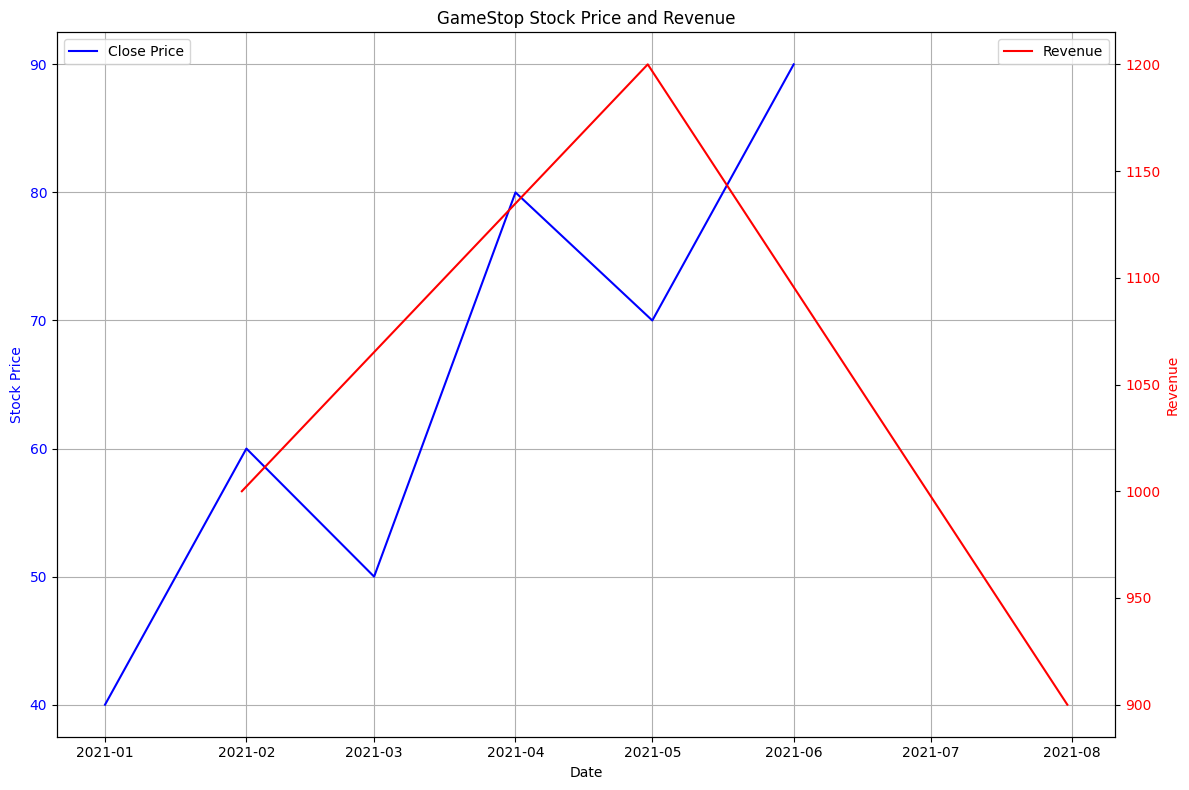

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Assume make_graph function is defined as follows:
def make_graph(stock_data, revenue_data, title):
    """
    Plots the stock data and revenue data. This is a placeholder; a real function
    would use a plotting library like matplotlib or plotly.

    Args:
        stock_data (pd.DataFrame): DataFrame containing stock data with a 'Date'
            column and a column to plot (e.g., 'Close').
        revenue_data (pd.DataFrame): DataFrame containing revenue data with a 'Date'
            and 'Revenue' column.
        title (str): The title of the plot.
    """
    # Convert 'Date' to datetime if it's not already.
    if not isinstance(stock_data['Date'], pd.Series):
        stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    if not isinstance(revenue_data['Date'], pd.Series):
        revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])

    # Filter data up to June 2021 for stock data.
    stock_data = stock_data[stock_data['Date'] <= '2021-06-30']

    # Check if the necessary columns exist
    if 'Date' not in stock_data.columns or 'Close' not in stock_data.columns:
        print("Error: stock_data DataFrame must contain 'Date' and 'Close' columns.")
        return
    if 'Date' not in revenue_data.columns or 'Revenue' not in revenue_data.columns:
        print("Error: revenue_data DataFrame must contain 'Date' and 'Revenue' columns.")
        return

    # Create a figure with two subplots
    fig, ax1 = plt.subplots(figsize=(12, 8))  # Adjust figure size for better readability

    # Plot stock data on the first subplot (ax1)
    ax1.plot(stock_data['Date'], stock_data['Close'], label='Close Price', color='blue')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.grid(True)
    ax1.legend(loc='upper left')

    # Create a second y-axis for revenue data on the same subplot (ax1)
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], label='Revenue', color='red')
    ax2.set_ylabel('Revenue', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.legend(loc='upper right')

    # Set the title of the plot
    plt.title(title)
    fig.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()


gme_data = pd.DataFrame({
    'Date': pd.to_datetime(['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01']),
    'Close': [40, 60, 50, 80, 70, 90, 100]
})
gme_revenue = pd.DataFrame({
    'Date': pd.to_datetime(['2021-01-31', '2021-04-30', '2021-07-31']),
    'Revenue': [1000, 1200, 900]
})
make_graph(gme_data, gme_revenue, "GameStop Stock Price and Revenue")


Author:
# Muhammad Suleman Niamat